In [17]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

In [18]:
dataset = pd.read_csv('../preprocessing/preprocessed-training.csv')
dataset

,Arrival Delay (Minutes),Average Temperature(Celcius) /Day,Minimum Temperature(Celcius) /Day,Maximum Temperature(Celcius) /Day,Daily Precipitation(mm) /Day,Maximum Snowfall(mm) /Day,Wind Direction(Degrees) /Day,Wind Speed(km/h) /Day,Atmospheric Pressure(hPa) /Day,Day,Month,Year,Scheduled Arrival Hour,Scheduled Arrival Minute,Status,Origin Airport_EWR,Origin Airport_IAD,Origin Airport_ORD
0,51,14.40,13.30,16.70,16.50,0.00,165.00,7.60,"1,006.70",1,1,2022,23,10,Severely Late,0,1,0
1,-6,-0.90,-4.90,1.10,1.30,100.00,111.00,10.40,"1,010.50",1,1,2023,14,58,On-Time,0,0,0
2,1,11.30,7.20,14.40,0.00,0.00,241.00,13.00,"1,012.60",1,1,2023,23,14,On-Time,1,0,0
3,-10,4.30,2.80,7.20,4.10,0.00,245.00,6.10,"1,013.70",1,1,2023,23,57,On-Time,0,0,1
4,17,14.70,5.60,17.80,1.80,0.00,324.00,13.00,"1,006.60",2,1,2022,23,10,Late,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,-1,4.60,3.30,7.80,0.00,0.00,294.00,16.90,"1,004.80",31,12,2019,18,15,On-Time,1,0,0
2083,-6,11.90,10.60,16.10,0.50,0.00,201.00,7.90,"1,012.80",31,12,2021,18,38,On-Time,0,1,0
2084,-12,-0.10,-3.20,9.40,0.00,130.00,189.00,14.00,"1,005.00",31,12,2022,14,58,Early,0,0,0
2085,-24,0.10,-3.20,3.90,0.00,0.00,23.00,4.30,"1,013.40",31,12,2022,21,8,Early,0,0,1


In [19]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = ['Status','Arrival Delay (Minutes)']), 
                 dataset['Status'], 
                 test_size=0.20, random_state=35)

In [20]:
!pip3 install catboost


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
from catboost import CatBoostClassifier
model= CatBoostClassifier(iterations=500,
                                   task_type="CPU",
                                   devices='0:1'
                         )
model.fit(X_train,y_train,verbose=True)

Learning rate set to 0.145894
0:	learn: 1.3398491	total: 4.12ms	remaining: 2.06s
1:	learn: 1.3012336	total: 8.81ms	remaining: 2.19s
2:	learn: 1.2724574	total: 12.9ms	remaining: 2.14s
3:	learn: 1.2477596	total: 16.8ms	remaining: 2.09s
4:	learn: 1.2290424	total: 20.6ms	remaining: 2.04s
5:	learn: 1.2102809	total: 24.6ms	remaining: 2.02s
6:	learn: 1.1984940	total: 28.5ms	remaining: 2.01s
7:	learn: 1.1832348	total: 32.2ms	remaining: 1.98s
8:	learn: 1.1725180	total: 36.1ms	remaining: 1.97s
9:	learn: 1.1609628	total: 40.3ms	remaining: 1.98s
10:	learn: 1.1525245	total: 44ms	remaining: 1.96s
11:	learn: 1.1456561	total: 48.2ms	remaining: 1.96s
12:	learn: 1.1371229	total: 52.2ms	remaining: 1.95s
13:	learn: 1.1313908	total: 55.9ms	remaining: 1.94s
14:	learn: 1.1236352	total: 59.7ms	remaining: 1.93s
15:	learn: 1.1167613	total: 63.5ms	remaining: 1.92s
16:	learn: 1.1115255	total: 67.3ms	remaining: 1.91s
17:	learn: 1.1034561	total: 71.2ms	remaining: 1.91s
18:	learn: 1.0977289	total: 75ms	remaining: 1.

189:	learn: 0.6265053	total: 675ms	remaining: 1.1s
190:	learn: 0.6241310	total: 679ms	remaining: 1.1s
191:	learn: 0.6233661	total: 682ms	remaining: 1.09s
192:	learn: 0.6222215	total: 686ms	remaining: 1.09s
193:	learn: 0.6202881	total: 690ms	remaining: 1.09s
194:	learn: 0.6187871	total: 693ms	remaining: 1.08s
195:	learn: 0.6164553	total: 696ms	remaining: 1.08s
196:	learn: 0.6141717	total: 700ms	remaining: 1.08s
197:	learn: 0.6114421	total: 703ms	remaining: 1.07s
198:	learn: 0.6100581	total: 707ms	remaining: 1.07s
199:	learn: 0.6080636	total: 711ms	remaining: 1.06s
200:	learn: 0.6060874	total: 714ms	remaining: 1.06s
201:	learn: 0.6038556	total: 717ms	remaining: 1.06s
202:	learn: 0.6016821	total: 720ms	remaining: 1.05s
203:	learn: 0.5995584	total: 724ms	remaining: 1.05s
204:	learn: 0.5988192	total: 728ms	remaining: 1.05s
205:	learn: 0.5977686	total: 732ms	remaining: 1.04s
206:	learn: 0.5962473	total: 735ms	remaining: 1.04s
207:	learn: 0.5946213	total: 738ms	remaining: 1.04s
208:	learn: 0.

350:	learn: 0.4109220	total: 1.21s	remaining: 514ms
351:	learn: 0.4104047	total: 1.22s	remaining: 511ms
352:	learn: 0.4094394	total: 1.22s	remaining: 508ms
353:	learn: 0.4084294	total: 1.22s	remaining: 504ms
354:	learn: 0.4073626	total: 1.23s	remaining: 501ms
355:	learn: 0.4063553	total: 1.23s	remaining: 497ms
356:	learn: 0.4048251	total: 1.23s	remaining: 494ms
357:	learn: 0.4034347	total: 1.24s	remaining: 490ms
358:	learn: 0.4029515	total: 1.24s	remaining: 487ms
359:	learn: 0.4017492	total: 1.24s	remaining: 483ms
360:	learn: 0.4008103	total: 1.25s	remaining: 480ms
361:	learn: 0.3996791	total: 1.25s	remaining: 477ms
362:	learn: 0.3987581	total: 1.25s	remaining: 473ms
363:	learn: 0.3980007	total: 1.26s	remaining: 470ms
364:	learn: 0.3973421	total: 1.26s	remaining: 466ms
365:	learn: 0.3960286	total: 1.26s	remaining: 462ms
366:	learn: 0.3947571	total: 1.27s	remaining: 459ms
367:	learn: 0.3935801	total: 1.27s	remaining: 455ms
368:	learn: 0.3921435	total: 1.27s	remaining: 452ms
369:	learn: 

In [22]:
predictions = model.predict(X_test)

In [23]:
# Convert the predictions to a DataFrame
predictions_df = pd.DataFrame(predictions, columns=['prediction'])

# Combine X_test and the predictions into a single DataFrame
combined_df = pd.concat([X_test.reset_index(drop=True), predictions_df], axis=1)
combined_df

,Average Temperature(Celcius) /Day,Minimum Temperature(Celcius) /Day,Maximum Temperature(Celcius) /Day,Daily Precipitation(mm) /Day,Maximum Snowfall(mm) /Day,Wind Direction(Degrees) /Day,Wind Speed(km/h) /Day,Atmospheric Pressure(hPa) /Day,Day,Month,Year,Scheduled Arrival Hour,Scheduled Arrival Minute,Origin Airport_EWR,Origin Airport_IAD,Origin Airport_ORD,prediction
0,13.80,7.80,14.40,0.00,0.00,306.00,25.90,"1,013.50",20,3,2022,23,19,0,1,0,On-Time
1,9.70,0.00,19.40,0.00,0.00,324.00,4.70,"1,019.80",21,10,2022,23,31,0,1,0,On-Time
2,9.70,5.00,17.20,0.00,0.00,11.00,18.40,"1,019.00",26,4,2020,20,48,0,0,1,On-Time
3,5.10,2.20,6.10,0.00,0.00,306.00,27.40,"1,012.50",17,10,2022,21,18,0,0,1,On-Time
4,9.50,5.00,13.90,0.00,0.00,11.00,12.20,"1,018.70",26,10,2021,21,2,0,0,1,Early
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,12.60,3.30,21.10,0.00,0.00,37.00,6.50,"1,020.80",22,3,2022,23,19,0,1,0,On-Time
414,27.30,22.80,33.30,0.00,0.00,216.00,21.60,"1,015.90",30,6,2022,16,50,0,0,1,Early
415,28.60,22.20,34.40,0.00,0.00,182.00,9.40,"1,014.60",21,9,2017,20,45,0,0,1,Early
416,2.60,-4.90,5.60,18.50,30.00,347.00,18.40,"1,019.70",3,1,2022,23,10,0,1,0,On-Time


In [24]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix, recall_score, precision_score, accuracy_score
print(classification_report(y_test, predictions, digits=3))

               precision    recall  f1-score   support

        Early      0.500     0.395     0.441       147
         Late      0.000     0.000     0.000        43
      On-Time      0.429     0.655     0.518       165
Severely Late      0.333     0.222     0.267        63

     accuracy                          0.431       418
    macro avg      0.315     0.318     0.306       418
 weighted avg      0.395     0.431     0.400       418



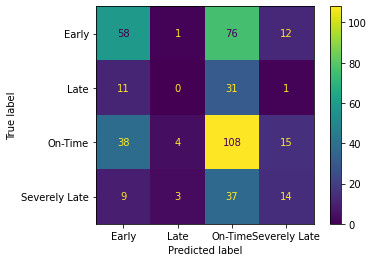

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=model.classes_)

disp.plot()

In [26]:
april_12_14 = pd.read_csv('../preprocessing/preprocessed-12-15-april.csv')

In [27]:
april_12_14  = april_12_14.drop(['Status'], axis = 1)

In [28]:
april_12_14['Status']= np.array(model.predict(april_12_14)).tolist()

In [29]:
april_12_14.to_csv('initial-predictions.csv', index = False)